In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('/content/cardekho_dataset.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [ ]:
dataset.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [ ]:
dataset.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


#Data Cleaning

#1.Identify & Handle Missing Values, Outliers, and Inconsistencies



In [ ]:
dataset.isnull().sum()

,0
Unnamed: 0,0
car_name,0
brand,0
model,0
vehicle_age,0
km_driven,0
seller_type,0
fuel_type,0
transmission_type,0
mileage,0


In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.isnull().sum()

,0
Unnamed: 0,0
car_name,0
brand,0
model,0
vehicle_age,0
km_driven,0
seller_type,0
fuel_type,0
transmission_type,0
mileage,0


In [ ]:
#Replace inconsistent values
dataset['fuel_type'] = dataset['fuel_type'].replace({
    'diesel': 'Diesel',
    'petrol': 'Petrol',
    'lpg': 'LPG'
})

In [ ]:
#checking duplicate values
dataset.duplicated().sum()

np.int64(0)

In [ ]:
#remove duplicate rows
dataset.drop_duplicates()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [ ]:
dataset.duplicated().sum()

np.int64(0)

In [ ]:
print("Original dataset shape:", dataset.shape)

Original dataset shape: (15411, 14)


##2.Validate Plausible Ranges and Values

Anomalies usually mean values that are out of range or don’t fit with the rest of the data.




In [ ]:
#Example: Check if values are within valid range (Vehicle Age)
print("vehicle age:", dataset['vehicle_age'].min(), "to", dataset['vehicle_age'].max())


vehicle age: 0 to 29


In [ ]:
#Example: Check if values are within valid range (max power)
print("max_power range:", dataset['max_power'].min(), "to", dataset['max_power'].max(),"liters")

Engine Size range: 38.4 to 626.0 liters


In [ ]:
#Example: Check if values are within valid range (fuel_efficiency)
print("Fuel Efficiency range:", dataset['mileage'].min(), "to", dataset['mileage'].max(),"mileage")



Fuel Efficiency range: 4.0 to 33.54 mileage


In [ ]:
#Example: Check if values are within valid range (engine_capacities)
print("Engine Capacities range:", dataset['engine'].min(), "to", dataset['engine'].max(),"litre")

Engine Capacities range: 793 to 6592 litre


##3.Visual Check with Boxplot
Distribution = how your data is spread across different values.

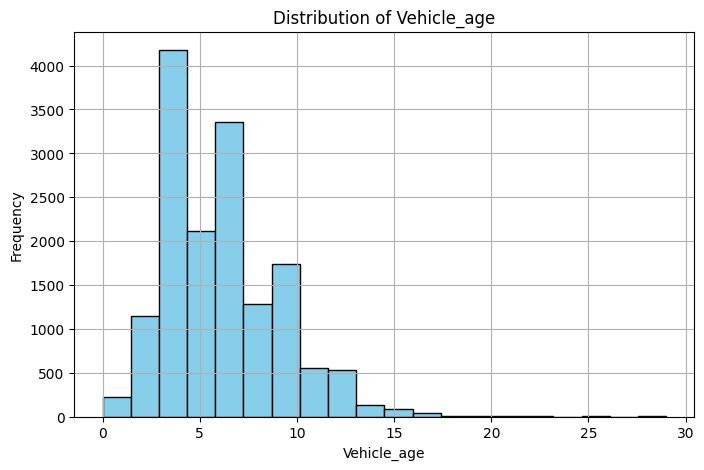

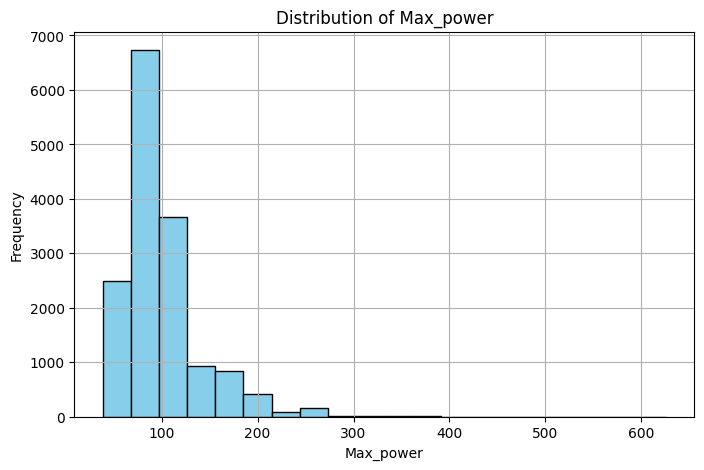

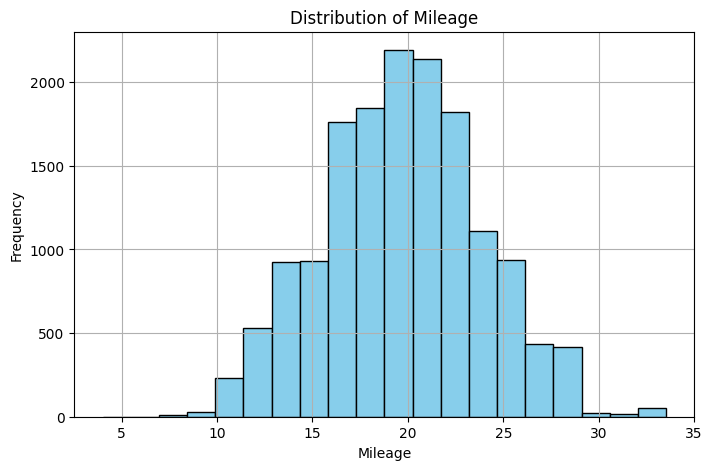

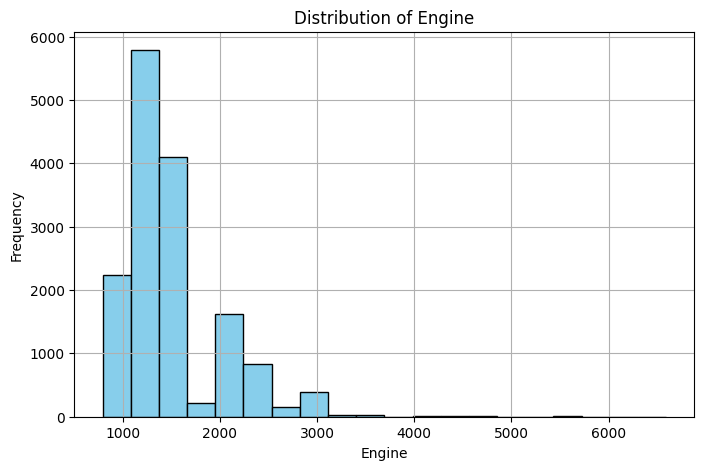

In [ ]:
import matplotlib.pyplot as plt

# List of numeric columns you want to check
columns = ['vehicle_age', 'max_power', 'mileage','engine']

# Loop through each and plot
for col in columns:
    plt.figure(figsize=(8, 5))
    plt.hist(dataset[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [ ]:
print(dataset['engine'].describe())

count    15411.000000
mean      1486.057751
std        521.106696
min        793.000000
25%       1197.000000
50%       1248.000000
75%       1582.000000
max       6592.000000
Name: engine, dtype: float64


#Data Analysis

##1. Explore Feature Relationships:
Understand how different columns (features) in your dataset relate to each other, especially the target variable (e.g., fuel efficiency).

In [ ]:
# Set Seaborn style to white grid background for plots
import seaborn as sns

sns.set(style='whitegrid')

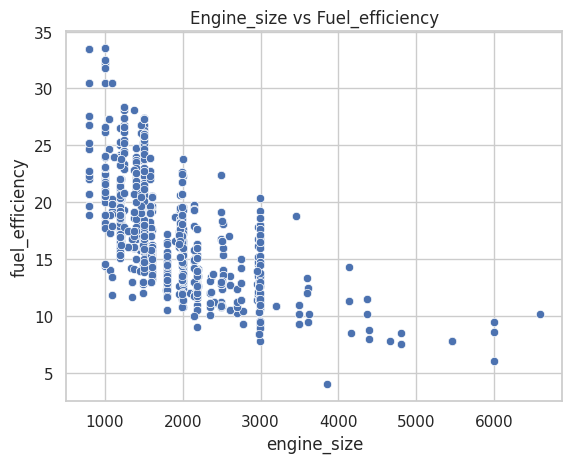

In [ ]:
# Plot engine size vs fuel efficiency to check their relationship visually

sns.scatterplot(data=dataset,x='engine',y='mileage')
plt.title("Engine_size vs Fuel_efficiency")
plt.xlabel("engine_size")
plt.ylabel("fuel_efficiency")
plt.show()

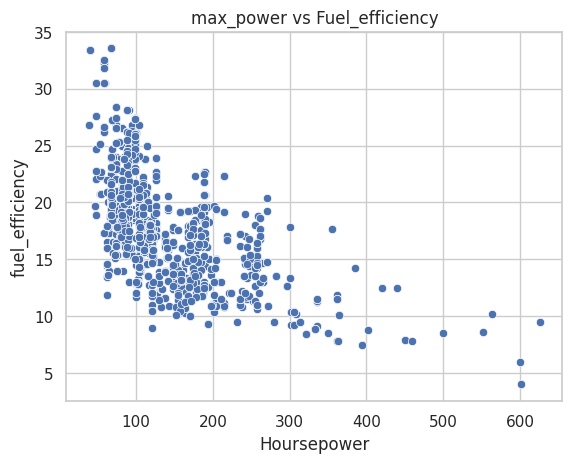

In [ ]:
# Plot horsepower vs fuel efficiency to visualize their relationship during EDA

sns.scatterplot(data=dataset,x="max_power",y="mileage")
plt.title("max_power vs Fuel_efficiency")
plt.xlabel("Hoursepower")
plt.ylabel("fuel_efficiency")
plt.show()

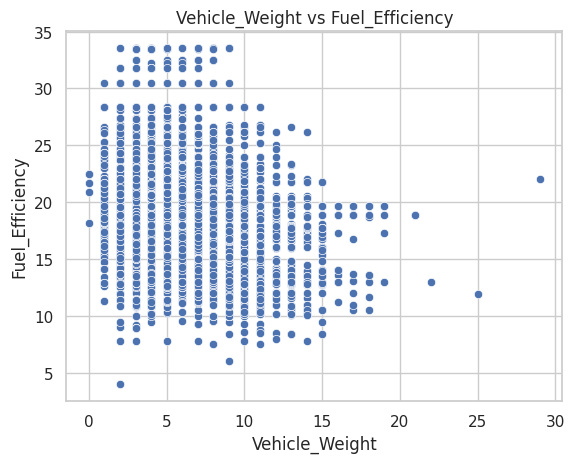

In [ ]:
# Plot vehicle weight vs fuel efficiency to visualize their relationship during EDA

sns.scatterplot(data=dataset,x="vehicle_age",y="mileage")
plt.title("Vehicle_Weight vs Fuel_Efficiency")
plt.xlabel("Vehicle_Weight")
plt.ylabel("Fuel_Efficiency")
plt.show()

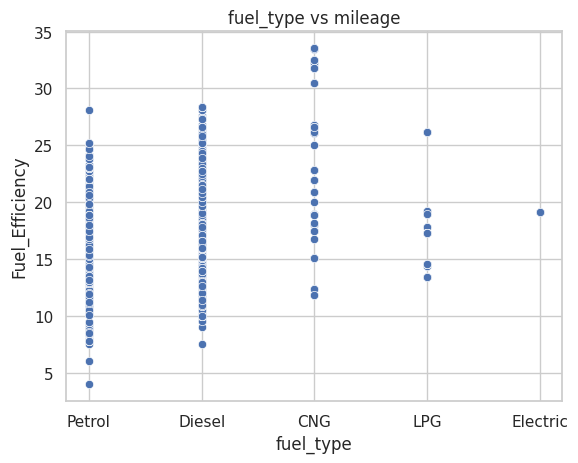

In [ ]:
# Plot model year vs fuel efficiency to observe how fuel efficiency has changed over the years

sns.scatterplot(data=dataset,x="fuel_type",y="mileage")
plt.title("fuel_type vs mileage")
plt.xlabel("fuel_type")
plt.ylabel("Fuel_Efficiency")
plt.show()

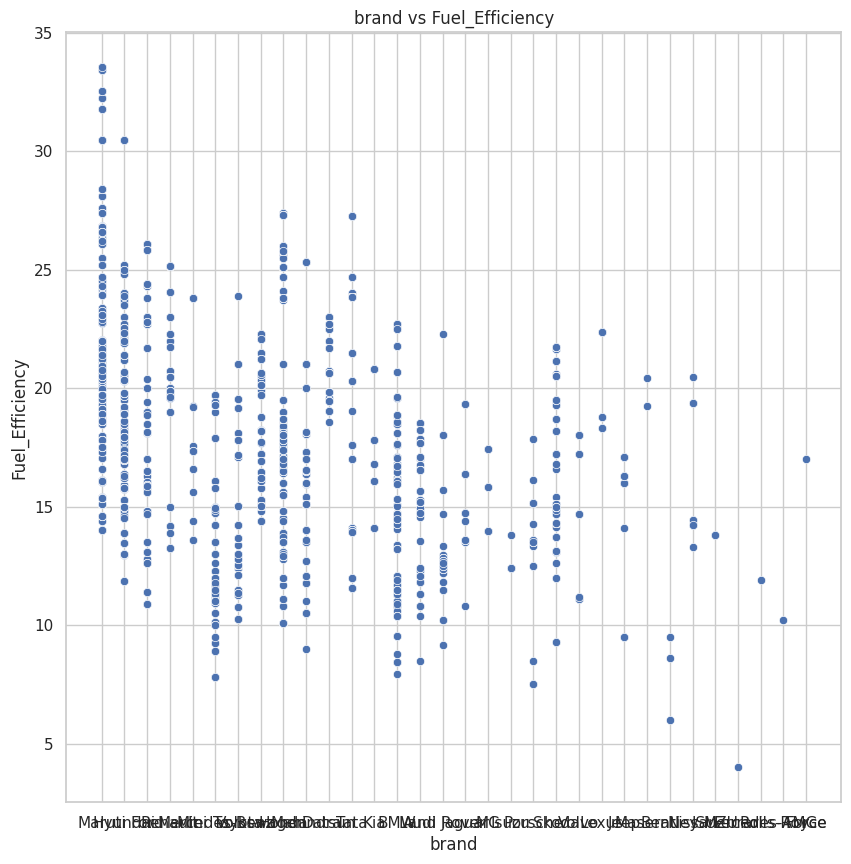

In [ ]:
# Plot fuel type vs fuel efficiency to compare how different fuel types affect efficiency
plt.figure(figsize=(10,10))
sns.scatterplot(data=dataset,x="brand",y="mileage")
plt.title("brand vs Fuel_Efficiency")
plt.xlabel("brand")
plt.ylabel("Fuel_Efficiency")
plt.show()

##2. Concise interpretation
A short sentence that clearly explains what you see in your graph or data.

##3.Hypothesize Possible Explanations Based on Feature Relationships
check which things affect fuel efficiency

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [ ]:
# Check how Engine_Size is related to Fuel_Efficiency
correlation = dataset["vehicle_age"].corr(dataset["mileage"])
print("Correlation between vehicle_age and Fuel Efficiency:", correlation)


Correlation between vehicle_age and Fuel Efficiency: -0.257393921408376


In [ ]:
# Check how vehicle_id is related to Fuel_Efficiency
correlation = dataset["km_driven"].corr(dataset["mileage"])
print("Correlation between  km_driven  and Fuel Efficiency:", correlation)

Correlation between  km_driven  and Fuel Efficiency: -0.10523927956576762


In [ ]:
# Check how engine is related to Fuel_Efficiency
correlation = dataset["engine"].corr(dataset["mileage"])
print("Correlation between  engine  and Fuel Efficiency:", correlation)

Correlation between  engine  and Fuel Efficiency: -0.632987074009182


In [ ]:
# Check how max_power is related to Fuel_Efficiency
correlation = dataset["max_power"].corr(dataset["mileage"])
print("Correlation between  max_power  and Fuel Efficiency:", correlation)

Correlation between  max_power  and Fuel Efficiency: -0.5331279319281697


In [ ]:
# Check how  seats  is related to Fuel_Efficiency
correlation = dataset["seats"].corr(dataset["mileage"])
print("Correlation between   seats  and Fuel Efficiency:", correlation)

Correlation between   seats  and Fuel Efficiency: -0.44027981777278435


In [ ]:
# Check how selling_price is related to Fuel_Efficiency
correlation = dataset["selling_price"].corr(dataset["mileage"])
print("Correlation between  selling_price  and Fuel Efficiency:", correlation)

Correlation between  selling_price  and Fuel Efficiency: -0.30554884997212695


#Feature Engineering

## 1.Derive additional features
 creating new columns from existing ones to help your machine learning model perform better.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


# Feature Scaling
Feature scaling is the process of making sure all the numerical values in your dataset are on a similar scale.

## 1. Standardizing and Normalizing the Feature Ranges for Model Training


In [ ]:
dataset.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [ ]:
dataset['car_name'] = le.fit_transform(dataset['car_name'])

In [ ]:
dataset['brand'] = le.fit_transform(dataset['brand'])

In [ ]:
dataset['fuel_type'] = le.fit_transform(dataset['fuel_type'])

In [ ]:
dataset['fuel_type'] = le.fit_transform(dataset['fuel_type'])

In [ ]:
dataset['transmission_type'] = le.fit_transform(dataset['transmission_type'])

In [ ]:
dataset['model'] = le.fit_transform(dataset['model'])

In [ ]:
dataset['seller_type'] = le.fit_transform(dataset['seller_type'])

In [ ]:
dataset.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,65,18,7,9,120000,1,4,1,19.70,796,46.30,5,120000
1,1,34,8,54,5,20000,1,4,1,18.90,1197,82.00,5,550000
2,2,40,8,118,11,60000,1,4,1,17.00,1197,80.00,5,215000
3,3,65,18,7,9,37000,1,4,1,20.92,998,67.10,5,226000
4,4,20,6,38,6,30000,0,1,1,22.77,1498,98.59,5,570000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  int64  
 2   brand              15411 non-null  int64  
 3   model              15411 non-null  int64  
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  int64  
 7   fuel_type          15411 non-null  int64  
 8   transmission_type  15411 non-null  int64  
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.6 MB


In [ ]:
X=dataset.drop(columns=['Unnamed: 0','mileage'],axis=1)
y=dataset['mileage']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler=MinMaxScaler()
minmax=minmax_scaler.fit_transform(X)
minmaxscaler_df=pd.DataFrame(X)

minmaxscaler_df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,engine,max_power,seats,selling_price
0,65,18,7,9,120000,1,4,1,796,46.30,5,120000
1,34,8,54,5,20000,1,4,1,1197,82.00,5,550000
2,40,8,118,11,60000,1,4,1,1197,80.00,5,215000
3,65,18,7,9,37000,1,4,1,998,67.10,5,226000
4,20,6,38,6,30000,0,1,1,1498,98.59,5,570000


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
std_df=pd.DataFrame(X_scaled)

In [ ]:
std_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.137617,0.343330,-1.519714,0.983562,1.247335,1.189966,1.001423,0.510503,-1.324259,-1.263352,-0.403022,-0.732548
1,-0.874864,-0.898412,-0.225693,-0.343933,-0.690016,1.189966,1.001423,0.510503,-0.554718,-0.432571,-0.403022,-0.251618
2,-0.678900,-0.898412,1.536377,1.647309,0.084924,1.189966,1.001423,0.510503,-0.554718,-0.479113,-0.403022,-0.626296
3,0.137617,0.343330,-1.519714,0.983562,-0.360667,1.189966,1.001423,0.510503,-0.936610,-0.779312,-0.403022,-0.613993
4,-1.332113,-1.146761,-0.666211,-0.012060,-0.496281,-0.768028,-0.967649,0.510503,0.022918,-0.046502,-0.403022,-0.229249


# 2.Apply PCA -

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=12)


In [ ]:
principal_components = pca.fit_transform(std_df)

In [ ]:
print(pca.explained_variance_ratio_)


[0.2587187  0.19647221 0.12616183 0.09251288 0.07914688 0.07200113
 0.05915912 0.04709055 0.04136845 0.02027895 0.00669321 0.00039611]


In [ ]:
pca_df=pd.DataFrame(principal_components)

In [ ]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-2.122411,0.408316,0.958391,-0.314693,-2.084672,0.957041,-0.493048,0.236303,0.323963,0.576632,-0.088911,-0.053493
1,-1.410121,-1.295442,-0.124482,1.017135,-0.259270,0.705394,0.523983,0.043249,0.227004,-0.062523,0.062021,0.027252
2,-1.718190,-0.410437,1.345131,-0.162305,1.185554,1.689463,0.873535,-0.262580,0.023674,0.266420,0.029594,0.012424
3,-1.753688,0.011026,0.109299,-0.087419,-1.896262,0.822880,0.455531,-0.700184,0.295051,0.282911,-0.109799,-0.047846
4,-0.083320,-1.541920,0.844542,0.355611,0.046325,-1.433471,-0.075321,-0.665657,0.015070,-0.207104,0.059980,-0.087809


In [ ]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       15411 non-null  float64
 1   1       15411 non-null  float64
 2   2       15411 non-null  float64
 3   3       15411 non-null  float64
 4   4       15411 non-null  float64
 5   5       15411 non-null  float64
 6   6       15411 non-null  float64
 7   7       15411 non-null  float64
 8   8       15411 non-null  float64
 9   9       15411 non-null  float64
 10  10      15411 non-null  float64
 11  11      15411 non-null  float64
dtypes: float64(12)
memory usage: 1.4 MB


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  int64  
 1   brand              15411 non-null  int64  
 2   model              15411 non-null  int64  
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  int64  
 6   fuel_type          15411 non-null  int64  
 7   transmission_type  15411 non-null  int64  
 8   engine             15411 non-null  int64  
 9   max_power          15411 non-null  float64
 10  seats              15411 non-null  int64  
 11  selling_price      15411 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 1.4 MB


In [ ]:
# Save your cleaned DataFrame to a CSV file
dataset.to_csv("cleaned_fuel_efficiency.csv", index=False)


Appropriate ML Models for Fuel Efficiency Prediction -

Fuel Efficiency Prediction – Model Accuracy Scores


1. Linear Regression -  [0.7242934207273322]
2. Decision Tree Regressor -   [0.956080813376924]
3. Random Forest Regressor -     0.9757894298062031
4. Support Vector Regressor (SVR) -  0.8450584791413279



#Applying the Random Forest regressor model

In [81]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [85]:
df=pd.read_csv('/content/cleaned_fuel_efficiency.csv')

In [86]:
# 3. Prepare X and y
X = df.drop(columns=['Unnamed: 0', 'mileage'], axis=1)
y = df['mileage']

In [87]:
# 4. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# 5. Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [89]:
# 6. Predict
y_pred = rf_model.predict(X_test)

In [90]:
# 7. Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.9757894298062031
MSE: 0.4273908535566822


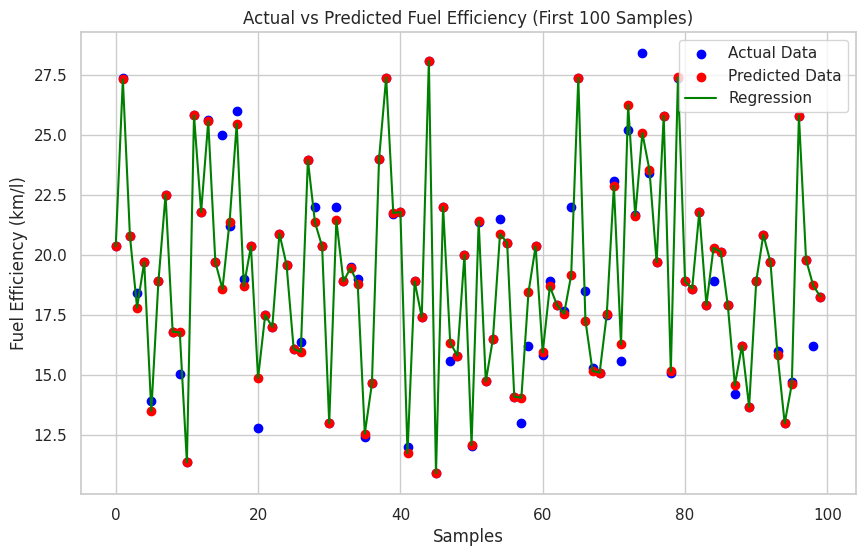

In [91]:
plt.figure(figsize=(10,6))

# Take only first 100 samples for clarity
n = 100
plt.scatter(range(n), y_test[:n], color="blue", label="Actual Data")
plt.scatter(range(n), y_pred[:n], color="red", label="Predicted Data")
plt.plot(range(n), y_pred[:n], color="green", label="Regression")

plt.xlabel("Samples")
plt.ylabel("Fuel Efficiency (km/l)")
plt.title("Actual vs Predicted Fuel Efficiency (First 100 Samples)")
plt.legend()
plt.show()